In [4]:
import os
import sys
import re
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
from larval_gonad.notebook import Nb

In [5]:
# Setup notebook
nbconfig = Nb.setup_notebook(seurat_dir='../output/scrnaseq-wf/scrnaseq_combine_force')

last updated: 2019-03-13 
Git hash: 173eaff397ec9ee0528b24f211ee150515c77c40


In [132]:
chrom_counts = (
    pd.read_parquet('../output/scrnaseq-wf/raw.parquet')
    .join(pd.read_parquet('../output/x-to-a-wf/fbgn2chrom.parquet'))
    .groupby('chrom')
    .sum()
    .T
    .assign(rep=lambda df: df.index.str.extract('(rep\d)', expand=False))
    .join(pd.read_parquet('../output/scrnaseq-wf/clusters.parquet'))
    .assign(cluster=lambda df: pd.Categorical(df.cluster.map(nbconfig.short_cluster_annot), ordered=True, categories=nbconfig.short_cluster_order))
    .dropna()
)

In [133]:
chrom_counts

,chr2L,chr2R,chr3L,chr3R,chr4,chrM,chrX,chrY,rep,cluster
rep1_AAACCTGAGACAAGCC,286,358,224,378,1,62,209,0,rep1,MC
rep1_AAACCTGAGCTTATCG,184,357,186,238,7,102,246,0,rep1,MC
rep1_AAACCTGGTGTAATGA,166,207,137,160,10,156,139,0,rep1,EC
rep1_AAACCTGGTTCATGGT,1615,1359,1002,1698,21,66,551,2,rep1,M1º
rep1_AAACCTGTCCCTCTTT,103,139,87,116,4,64,88,0,rep1,MC
rep1_AAACGGGAGACTGGGT,2510,4097,2478,3211,145,758,3036,0,rep1,LC
rep1_AAACGGGCACAGTCGC,277,380,217,307,4,66,240,0,rep1,L1º
rep1_AAACGGGGTCGCGTGT,207,143,142,249,6,68,83,2,rep1,L1º
rep1_AAACGGGGTGTTAAGA,5429,6053,4159,5441,207,438,5437,0,rep1,EC
rep1_AAACGGGTCGTCCAGG,124,141,96,118,1,99,84,0,rep1,MC


/home/fearjm/miniconda3/envs/larval_gonad/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


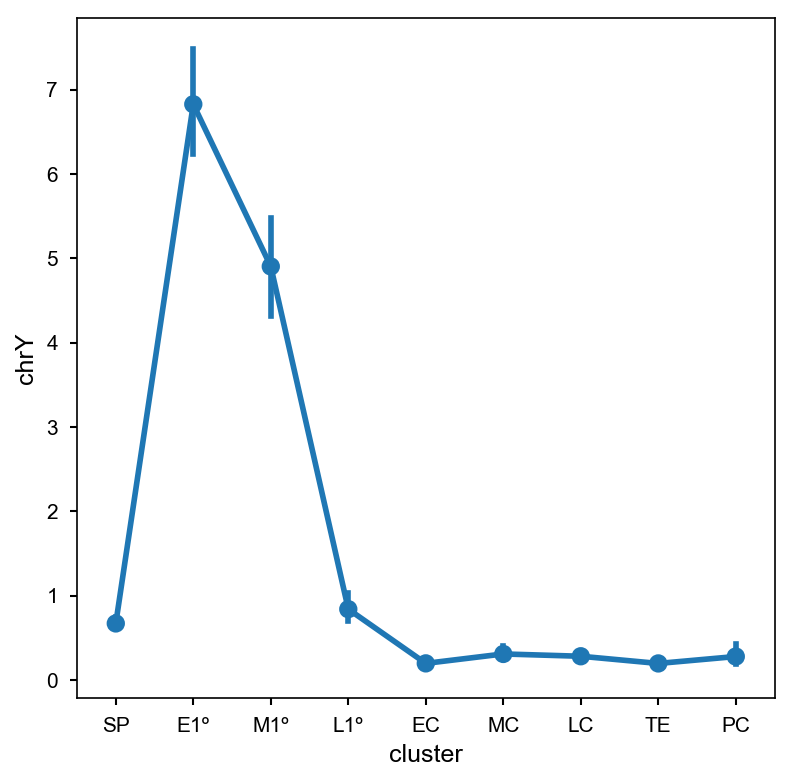

In [135]:
sns.pointplot('cluster', 'chrY', data=chrom_counts)

/home/fearjm/miniconda3/envs/larval_gonad/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


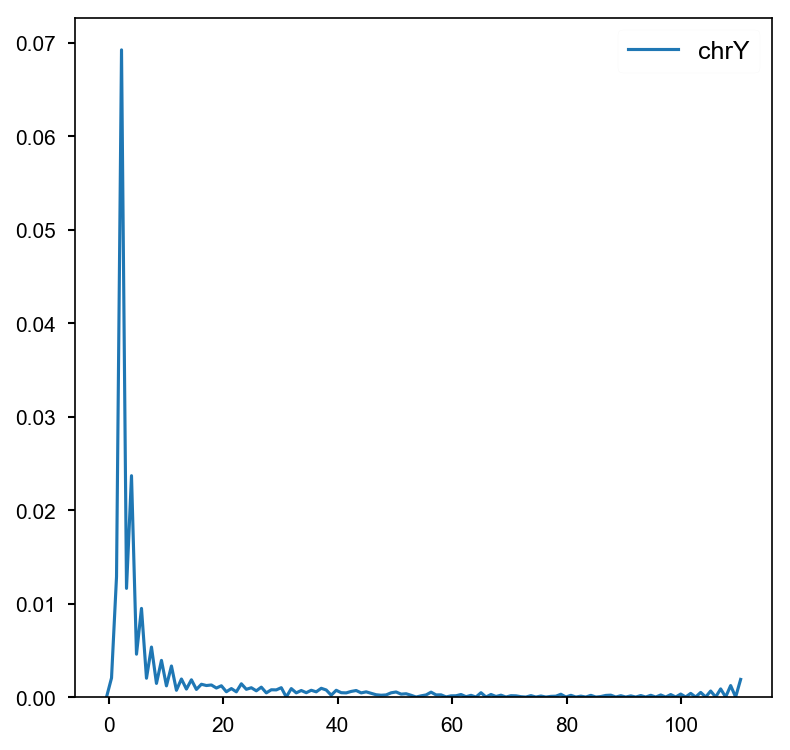

In [136]:
sns.kdeplot(chrom_counts.chrY)

In [212]:
expressed = (
    pd.read_parquet('../output/x-to-a-wf/expressed_genes_by_chrom.parquet')
    .join(pd.read_parquet('../output/scrnaseq-wf/clusters.parquet'))
    .assign(cluster=lambda df: pd.Categorical(df.cluster.map(nbconfig.short_cluster_annot), ordered=True, categories=nbconfig.short_cluster_order))
    .dropna()
    .assign(rep=lambda df: df.index.str.extract('(rep\d)', expand=False))
)

In [213]:
expressed

,chr2L,chr2R,chr3L,chr3R,chr4,chrM,chrX,chrY,cluster,rep
rep1_AAACCTGAGACAAGCC,151.0,172.0,136.0,179.0,1.0,8.0,99.0,0.0,MC,rep1
rep1_AAACCTGAGCTTATCG,82.0,120.0,96.0,104.0,4.0,9.0,73.0,0.0,MC,rep1
rep1_AAACCTGGTGTAATGA,88.0,112.0,90.0,102.0,8.0,9.0,62.0,0.0,EC,rep1
rep1_AAACCTGGTTCATGGT,458.0,429.0,384.0,519.0,10.0,7.0,232.0,2.0,M1º,rep1
rep1_AAACCTGTCCCTCTTT,56.0,59.0,61.0,66.0,3.0,6.0,49.0,0.0,MC,rep1
rep1_AAACGGGAGACTGGGT,501.0,576.0,551.0,697.0,36.0,12.0,493.0,0.0,LC,rep1
rep1_AAACGGGCACAGTCGC,190.0,197.0,154.0,197.0,4.0,7.0,123.0,0.0,L1º,rep1
rep1_AAACGGGGTCGCGTGT,122.0,96.0,102.0,137.0,3.0,8.0,59.0,2.0,L1º,rep1
rep1_AAACGGGGTGTTAAGA,596.0,648.0,660.0,785.0,38.0,10.0,576.0,0.0,EC,rep1
rep1_AAACGGGTCGTCCAGG,98.0,92.0,82.0,98.0,1.0,9.0,50.0,0.0,MC,rep1


In [199]:
cnts = (
    pd.read_parquet('../output/x-to-a-wf/raw_by_chrom.parquet')
    .join(pd.read_parquet('../output/scrnaseq-wf/clusters.parquet'))
    .assign(cluster=lambda df: pd.Categorical(df.cluster.map(nbconfig.short_cluster_annot), ordered=True, categories=nbconfig.short_cluster_order))
    .dropna().
)

In [207]:
from functools import partial

/home/fearjm/miniconda3/envs/larval_gonad/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


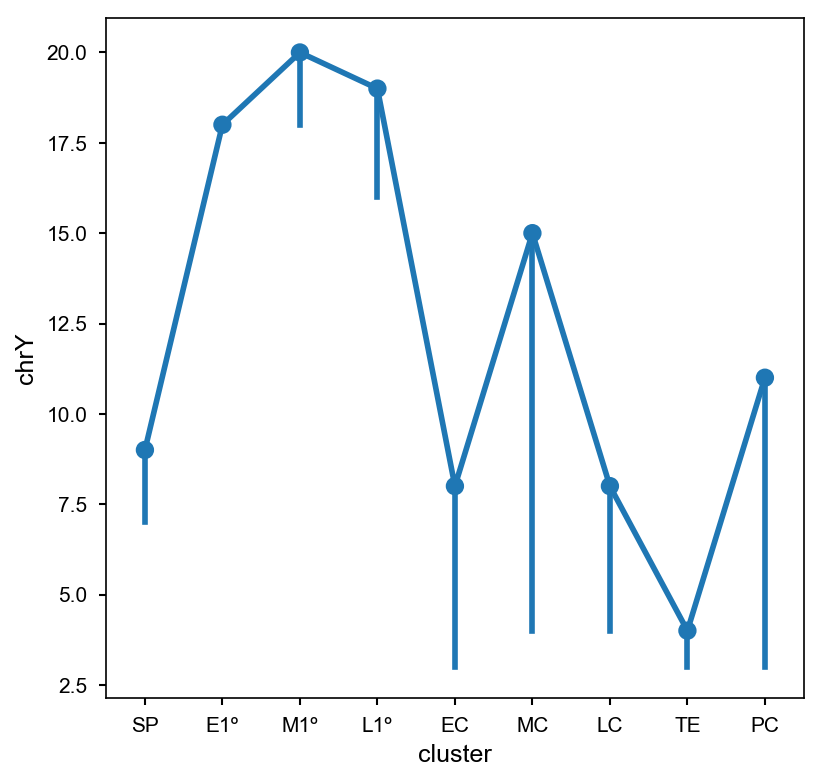

In [211]:
sns.pointplot('cluster', 'chrY', data=expressed, estimator=np.max, ci=95)

/home/fearjm/miniconda3/envs/larval_gonad/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


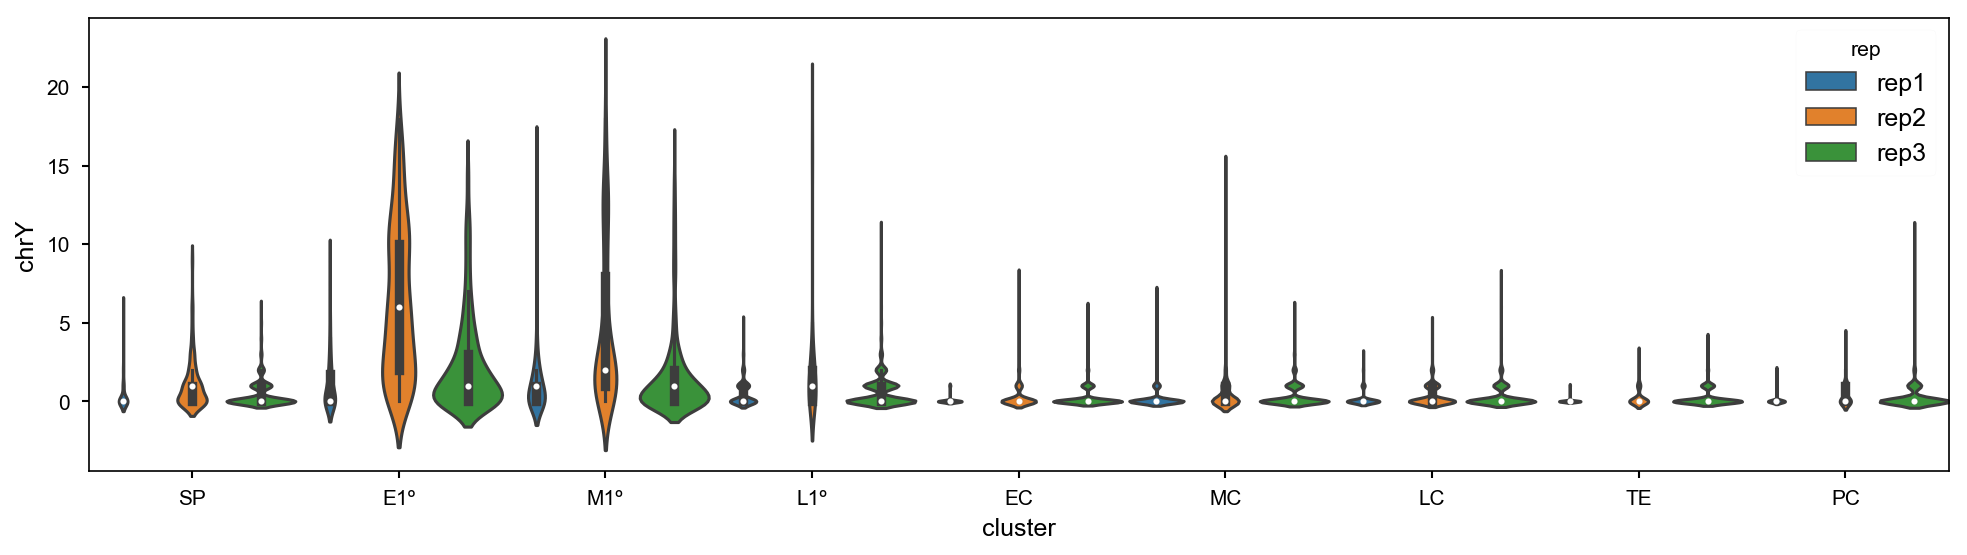

In [215]:
fig = plt.figure(figsize=plt.figaspect(1/4))
sns.violinplot('cluster', 'chrY', hue='rep', data=expressed, width=1, scale='count')

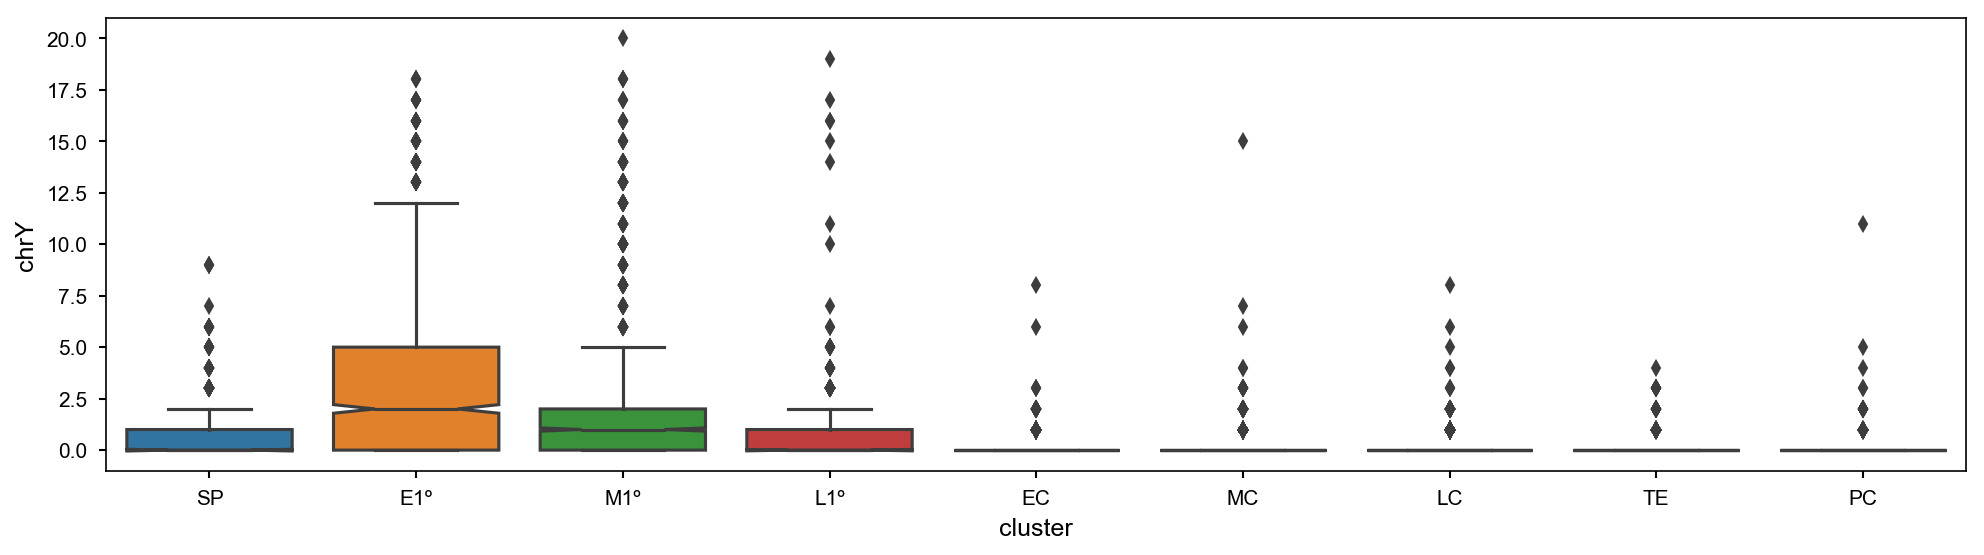

In [197]:
fig = plt.figure(figsize=plt.figaspect(1/4))
sns.boxplot('cluster', 'chrY', data=expressed, notch=True)

/home/fearjm/miniconda3/envs/larval_gonad/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


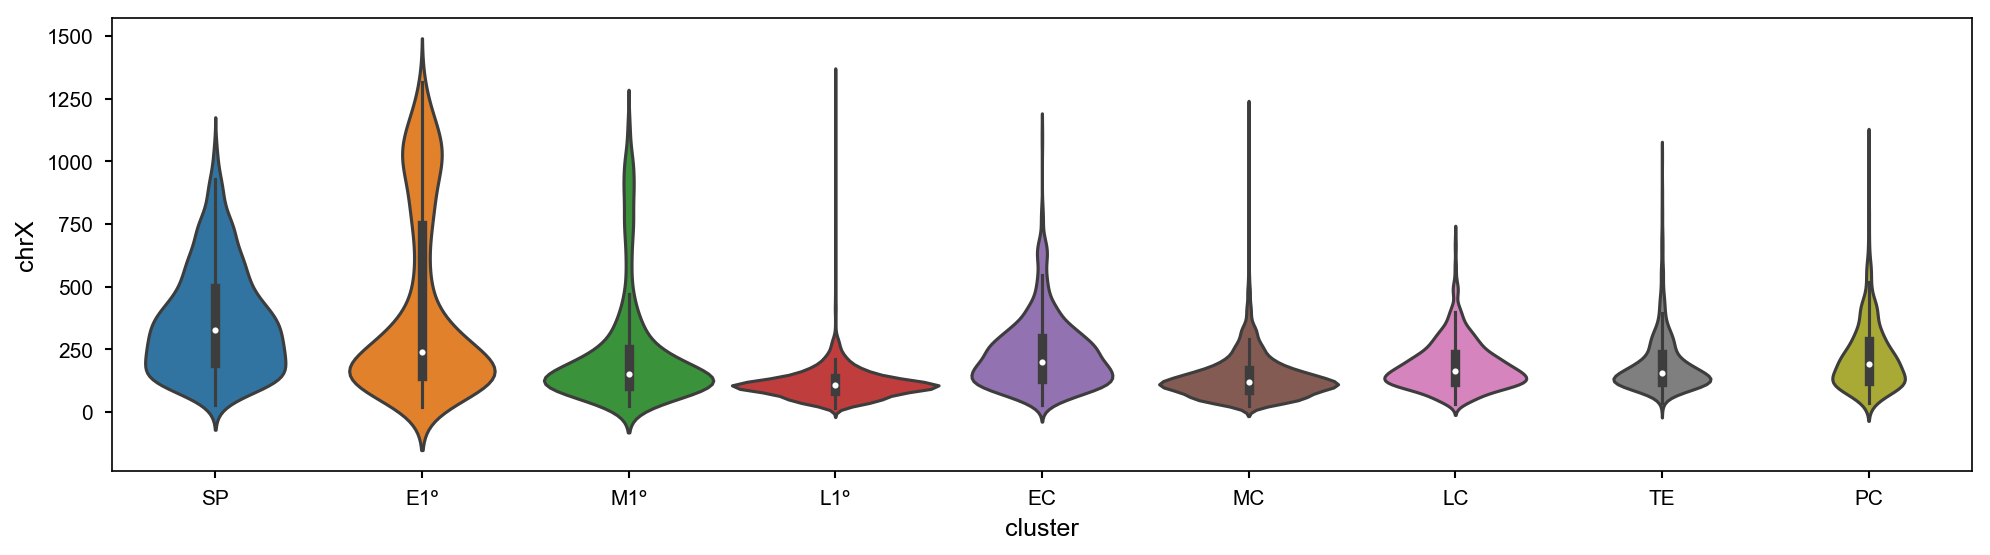

In [152]:
fig = plt.figure(figsize=plt.figaspect(1/4))
sns.violinplot('cluster', 'chrX', data=expressed, width=1, scale='count')

/home/fearjm/miniconda3/envs/larval_gonad/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


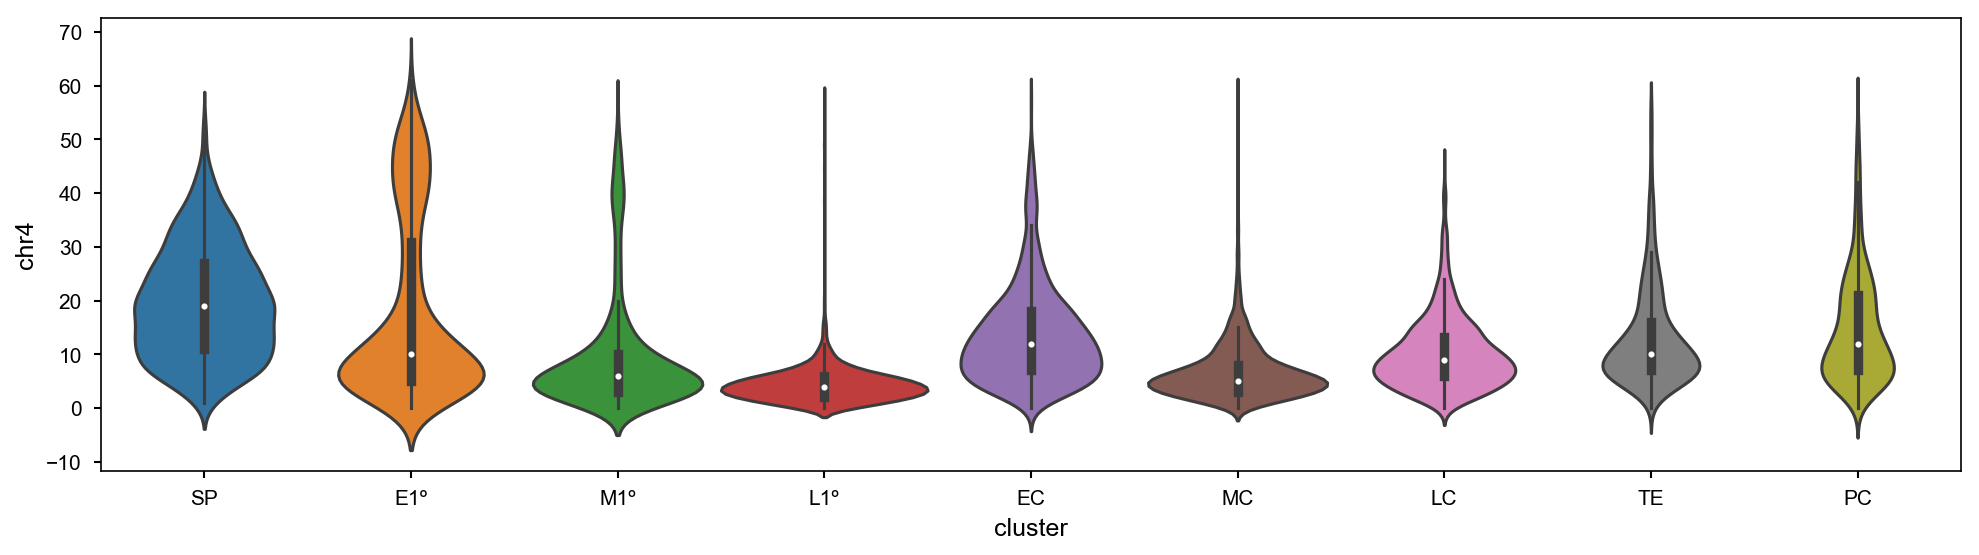

In [154]:
fig = plt.figure(figsize=plt.figaspect(1/4))
sns.violinplot('cluster', 'chr4', data=expressed, width=1, scale='count')

In [159]:
df = expressed[['chrY', 'cluster']]

In [186]:
pd.DataFrame(results, columns=['cluster', 'lower', 'median', 'upper'])

,cluster,lower,median,upper
0,SP,0.0,0.0,0.0
1,E1º,1.0,2.0,2.0
2,M1º,1.0,1.0,1.0
3,L1º,0.0,0.0,0.0
4,EC,0.0,0.0,0.0
5,MC,0.0,0.0,0.0
6,LC,0.0,0.0,0.0
7,TE,0.0,0.0,0.0
8,PC,0.0,0.0,0.0


In [195]:
df.groupby('cluster').chrY.apply(lambda x: (x > 0).mean())

cluster
SP     0.350402
E1º    0.710860
M1º    0.595397
L1º    0.415094
EC     0.152221
MC     0.202982
LC     0.208092
TE     0.150106
PC     0.178218
Name: chrY, dtype: float64

In [216]:
pd.read_pickle('../output/x-to-a-wf/num_genes_by_chrom.pkl')

chrom
chr2L    2798
chr2R    2897
chr3L    2903
chr3R    3509
chr4      102
chrM       18
chrX     2189
chrY       45
dtype: int64

In [239]:
(
    pd.read_csv('../output/scrnaseq-wf/scrnaseq_samples/testis1_force/outs/possorted_genome_bam.bam_counts', sep='\t').query('chromosome == "Y"')
    .assign(cell_id=lambda df: 'rep1_' + df.cell_id)
    .set_index('cell_id')
    .join(pd.read_parquet('../output/scrnaseq-wf/clusters.parquet'), how='inner')
    .groupby('cluster')
    .number_reads.median()
)

cluster
0      89.0
1      93.0
2      88.0
3     103.0
4      97.0
5      98.5
6     177.0
7     120.0
8     111.0
9      85.0
10     90.5
Name: number_reads, dtype: float64

In [238]:
cnts.assign(rep=lambda df: df.index.str.extract('(rep\d)', expand=False)).groupby(['rep', 'cluster']).chrY.sum()

rep   cluster
rep1  SP           45
      E1º         198
      M1º         654
      L1º         260
      EC           12
      MC          116
      LC           43
      TE            4
      PC            5
rep2  SP          465
      E1º        6104
      M1º        4381
      L1º         557
      EC           92
      MC          165
      LC          152
      TE           40
      PC           32
rep3  SP          407
      E1º        3377
      M1º        3060
      L1º         875
      EC          167
      MC          258
      LC          195
      TE          142
      PC          160
Name: chrY, dtype: int64

In [266]:
x = np.arange(0, 100, 10)
y = np.arange(0, 100, 10)

In [253]:
from itertools import product

In [267]:
xy = np.array(list(product(x, y)))

In [280]:
sizes = [np.random.randint(1, 1000) for i in range(100)]

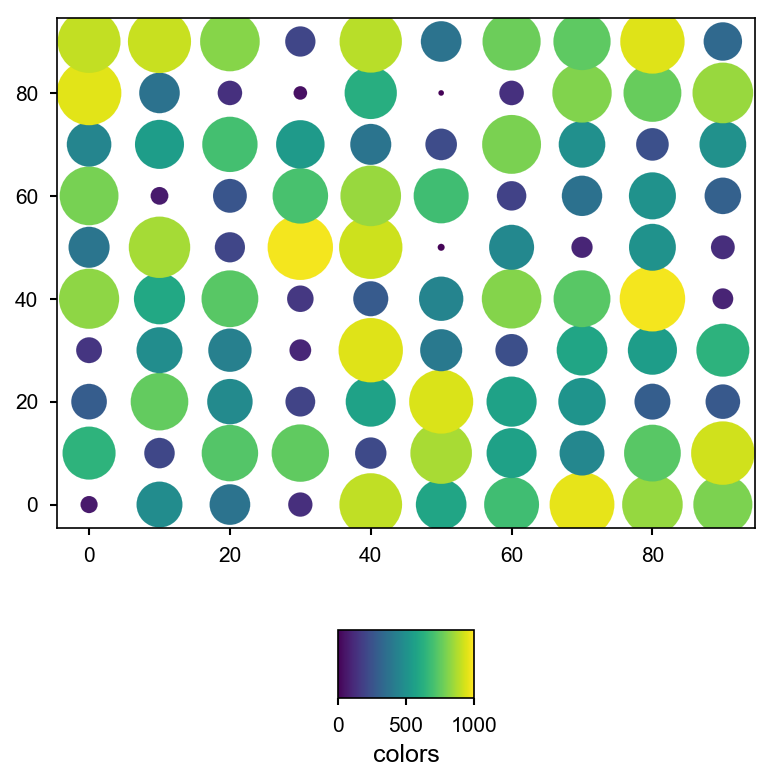

In [324]:
plt.scatter(xy[:, 0], xy[:, 1], s=sizes, c=sizes, vmin=0, vmax=1000, cmap='viridis')
plt.colorbar(orientation='horizontal', aspect=2, fraction=.1, label='colors', ticks=[0, 500, 1000])

In [348]:
df.head()

,cell_id,cluster,FBgn,UMI
0,rep1_AAACCTGAGACAAGCC,MC,FBgn0001313,0
1,rep1_AAACCTGAGCTTATCG,MC,FBgn0001313,0
2,rep1_AAACCTGGTGTAATGA,EC,FBgn0001313,0
3,rep1_AAACCTGGTTCATGGT,M1º,FBgn0001313,0
4,rep1_AAACCTGTCCCTCTTT,MC,FBgn0001313,0


In [354]:
def prop_cells(x):
    return (x > 0).mean()


In [530]:
df = (
    pd.read_parquet('../output/scrnaseq-wf/raw.parquet')
    .join(pd.read_parquet('../output/x-to-a-wf/fbgn2chrom.parquet'))
    .query('chrom == "chrY"')
    .drop('chrom', axis=1)
    .assign(gene_symbol=lambda df: df.index.map(nbconfig.fbgn2symbol))
    .set_index('gene_symbol')
    .T
    .join(pd.read_parquet('../output/scrnaseq-wf/clusters.parquet'))
    .assign(cluster=lambda df: pd.Categorical(df.cluster.map(nbconfig.short_cluster_annot), ordered=True, categories=nbconfig.short_cluster_order))
    .rename_axis('cell_id')
    .reset_index()
    .melt(id_vars=['cell_id', 'cluster'], var_name='gene_symbol', value_name='UMI')
    .groupby(['cluster', 'gene_symbol']).agg({'UMI': ['sum', prop_cells]})
)

df.columns = df.columns.droplevel(0)
df = df.reset_index()

df.gene_symbol = pd.Categorical(df.gene_symbol, ordered=True, categories=sorted([x for x in df.gene_symbol.unique() if not x.startswith('Su(Ste)')], key=lambda x: x.lower()))
df.dropna(inplace=True)

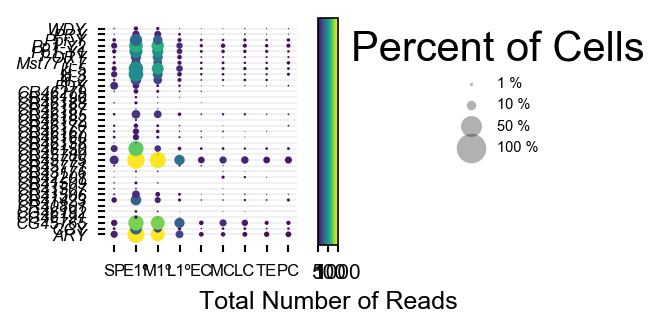

In [551]:
xvals = df.cluster.cat.codes
xlabels = df.cluster.cat.categories

yvals = df.gene_symbol.cat.codes
ylabels = df.gene_symbol.cat.categories

fig, (ax, cax) = plt.subplots(3, 2, figsize=(2, 2), gridspec_kw=dict(width_ratios=[1, .3], height_ratios=[1, .1, 1]))
sc = ax.scatter(xvals, yvals, c = df['sum'], s=df['prop_cells'] * 200, vmin=1, vmax=1000)
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=.2)
plt.colorbar(sc, cax=cax, orientation='horizontal', ticks=[1, 500, 1000], label='Total Number of Reads')

for sizes in [2, 20, 100, 200]:
    plt.scatter([], [], c='k', alpha=0.3, s=sizes, label=f'{sizes / 2:,.0f} %')
plt.legend(scatterpoints=1, frameon=False, labelspacing=.5, title='Percent of Cells', fontsize=7, loc='upper left', bbox_to_anchor=[1, 1])

ax.set(yticks=range(len(ylabels)), xticks=range(len(xlabels)))
ax.set_xticklabels(xlabels, fontsize=8)
ax.set_yticklabels(ylabels, fontsize=8, fontstyle='italic');
plt.margins(y=0.01)
sns.despine(ax=ax, left=True, bottom=True);